### Gauss Seidel Iteration Method

## What are Iterative Methods?

- Iterative or approximate methods provide an alternative to the elimination methods. 
- These approaches consist of guessing a value (we generally start off with 0s) and then using a systematic method to obtain a refined estimate of the root.

## Gauss-Seidel Method
- The Gauss-Seidel method is the most commonly used iterative method. Assume that we are given a set of n equations: 
    [A]{X} = {B}
- If the diagonal elements are all nonzero, the first equation can be solved for x 1, the second for x2, the third for x3 and
so on.
- As each new x value is computed for the Gauss-Seidel method, it is immediately used in the next equation to determine another x value. Thus, if the solution is converging, the best available estimates will be employed.

The Gauss-Seidel method can also exhibit some shortcomings. 
- For this method to converge to the real value, the diagonal element must be greater than the off-diagonal element for each row i.e., the matrix must be Diagonally dominant.

## Jacobi Iteration
- This is an alternative approach which utilizes a somewhat different tactic. 
- Rather than using the latest available x’s,this technique computes a set of new x’s on the basis of a set of old x’s. Thus, as new values are generated, they are not immediately used but rather are retained for the next iteration.
- Although there are certain cases where the Jacobi method is useful, Gauss-Seidel’s utilization of the best available
   estimates usually makes it the method of preference.

In [1]:
#importing libraries

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#edit the matrix below

a = np.array([[3, 7, 13], [1, 5, 3], [12, 3, -5]], float)

b = np.array([76, 28, 1], float)

In [3]:
#Gauss Seidel Iterative Method Code

x = [0, 0, 0]

def seidel(a, x, b):
    n = len(a)
    for j in range(0, n):
        d = b[j]
        for i in range(0, n):
            if (j != i):
                d -= a[j][i] * x[i]
        x[j] = d/a[j][j]
        
    return np.round(x, 7)

#run loop for 15 iterations 
for i in range(15):
    x = seidel(a,x,b)
    print("\nIteration " + str(i+1), str(x), sep = "\t")


Iteration 1	[25.3333333  0.5333333 60.92     ]

Iteration 2	[-239.8977777   17.0275555 -565.7381332]

Iteration 3	[2437.134281  -142.3839763 5763.4918887]

Iteration 4	[-24617.5689063   1471.018648  -58199.7541864]

Iteration 5	[248791.8912957 -14832.9257473 588200.5836614]

Iteration 6	[-2514233.7024557   149931.9902943 -5944201.8917171]

Iteration 7	[25408392.2200874 -1515151.7089872 60071050.1028174]

Iteration 8	[-2.56772504e+08  1.53118764e+07 -6.07066885e+08]

Iteration 9	[ 2.59489548e+09 -1.54738960e+08  6.13490578e+09]

Iteration 10	[-2.62235341e+10  1.56376336e+09 -6.19982239e+10]

Iteration 11	[ 2.65010189e+11 -1.58031035e+10  6.26542591e+11]

Iteration 12	[-2.67814399e+12  1.59703243e+11 -6.33172363e+12]

Iteration 13	[ 2.70648281e+13 -1.61393145e+12  6.39872287e+13]

Iteration 14	[-2.73512151e+14  1.63100930e+13 -6.46643106e+14]

Iteration 15	[ 2.76406324e+15 -1.64826785e+14  6.53485571e+15]


In [4]:
#Jacobi Iterative Method Code

x = [0,0,0]
def jacobi(a,x,b):
    n = len(a)
    y = [0,0,0]
    for j in range(n):
        d = b[j]
        for i in range(n):
            if (j != i):
                d -= a[j][i] * x[i]
        y[j] = d/a[j][j]
    x = y    
    return np.round(y, 7)

#run loop for 15 iterations 
for i in range(15):
    x = jacobi(a,x,b)
    print("\nIteration " + str(i+1), str(x), sep = "\t")


Iteration 1	[25.3333333  5.6       -0.2      ]

Iteration 2	[13.1333333  0.6533333 63.9599999]

Iteration 3	[-253.3511106  -35.4026666   31.7119999]

Iteration 4	[ -29.4791108   37.2430222 -629.4842654]

Iteration 5	[2666.1980983  389.1863814  -48.6040526]

Iteration 6	[-672.150662  -498.4771881 6632.1872648]

Iteration 7	[-27551.0313752  -3839.2822265  -1912.4479017]

Iteration 8	[ 17270.9327692   6663.2750161 -68426.2446364]

Iteration 9	[280991.4183868  37607.160228   45448.0036557]

Iteration 10	[-284666.0563734  -83461.4858708  696943.5002651]

Iteration 11	[-2825319.7007836  -361227.2888844  -733275.6268186]

Iteration 12	[ 4020416.7236109  1005034.9162479 -6997503.8552113]

Iteration 13	[27977460.5680039  3394424.5684046 10252020.8864149]

Iteration 14	[-52345722.500742  -11746699.0454497  69182559.9042521]

Iteration 15	[-2.72382103e+08 -3.10403858e+07 -1.32677754e+08]


This is giving absurd solutions, way off from expected value. 
This is because, for iterative methods, the absolute values of the slopes must be less than unity to ensure convergence. This might be because the matrix is not diagonally dominant. Let us check if the matrix is diagonally dominant or not.

In [5]:
# function to check if the matrix is diagonally dominant or not

def diag_dom(a):
    n = len(a)
    for i in range(n):
        sum = 0
        for j in range(n):
            sum += abs(a[i][j])
        sum -= abs(a[i][i])
        if (abs(a[i][i]) < sum):
            return False
    return True

diag_dom(a)        

False

In [6]:
a[[0, 2]] = a[[2, 0]]
b[[0, 2]] = b[[2, 0]]

print(a)
print("\n")
print(b)
diag_dom(a)

[[12.  3. -5.]
 [ 1.  5.  3.]
 [ 3.  7. 13.]]


[ 1. 28. 76.]


True

Now the matrix is diagonally dominant. Applying Gauss Seidel Iterative Method and Jacobi Iterative Method

In [7]:
x1 = [0,0,0]

sol = np.array([1,3,4], float)

for i in range(15):
    yyy = x1
    x1 = seidel(a,x1,b)
    print("\nIteration " + str(i+1), str(x1), sep = "\t")
    #printing error
    err = [0,0,0]
    err[0] = 100*abs((yyy[0] - x1[0]))/x1[0]
    err[1] = 100*abs((yyy[1] - x1[1]))/x1[1]
    err[2] = 100*abs((yyy[2] - x1[2]))/x1[2]
    print("Error:         ", np.round((err), 7))


Iteration 1	[0.0833333 5.5833333 2.8205128]
Error:          [4.e-05 6.e-07 7.e-07]

Iteration 2	[-0.1372863  3.9351496  3.7589086]
Error:          [-1.82e-05  4.00e-07  2.00e-07]

Iteration 3	[0.6657578 3.2115033 3.9632464]
Error:          [7.5e-06 9.0e-07 7.0e-07]

Iteration 4	[0.9318102 3.0356901 3.9965184]
Error:          [2.7e-06 8.0e-07 1.2e-06]

Iteration 5	[0.9896268 3.0041636 4.0001519]
Error:          [8.e-07 1.e-07 6.e-07]

Iteration 6	[0.9990224 3.0001044 4.0001694]
Error:          [8.e-07 6.e-07 1.e-07]

Iteration 7	[1.0000445 2.9998895 4.0000493]
Error:          [1.7e-06 1.2e-06 1.1e-06]

Iteration 8	[1.0000482 2.9999608 4.00001  ]
Error:          [3.3e-06 4.0e-07 0.0e+00]

Iteration 9	[1.000014  2.9999912 4.0000015]
Error:          [3.3e-06 2.0e-07 3.0e-07]

Iteration 10	[1.0000028 2.9999985 4.0000001]
Error:          [2.5e-06 1.2e-06 9.0e-07]

Iteration 11	[1.0000004 2.9999999 4.       ]
Error:          [1.7e-06 1.4e-06 5.0e-07]

Iteration 12	[1. 3. 4.]
Error:          

In [8]:
x1 = [0,0,0]
sol = np.array([1,3,4], float)

for i in range(50):
    x1 = jacobi(a,x1,b)
    print("\nIteration " + str(i+1), str(x1), sep = "\t")
    #printing error
    err = [0,0,0]
    err[0] = 100*abs((sol[0] - x1[0]))/x1[0]
    err[1] = 100*abs((sol[1] - x1[1]))/x1[1]
    err[2] = 100*abs((sol[2] - x1[2]))/x1[2]
    print("Error:         ", np.round((err), 7))


Iteration 1	[0.0833333 5.6       5.8461538]
Error:          [1100.00048     46.4285714   31.5789468]

Iteration 2	[1.1192308 2.0756411 2.8115385]
Error:          [10.6529234 44.5336576 42.2708599]

Iteration 3	[0.7358974 3.6892307 4.4702169]
Error:          [35.8885084 18.6822337 10.5188833]

Iteration 4	[1.023616  2.7706904 3.6898225]
Error:          [2.3071152 8.2762621 8.4062987]

Iteration 5	[0.9280868 3.1813833 4.1180246]
Error:          [7.7485425 5.7013973 2.8660489]

Iteration 6	[1.0038311 2.9435679 3.9189274]
Error:          [0.3816479 1.9171326 2.0687446]

Iteration 7	[0.9803278 3.0478773 4.0295024]
Error:          [2.0066961 1.5708408 0.7321599]

Iteration 8	[1.0003233 2.986233  3.9787597]
Error:          [0.0323196 0.4610156 0.5338422]

Iteration 9	[0.9945916 3.0126795 4.0073384]
Error:          [0.543781  0.4208712 0.183124 ]

Iteration 10	[0.9998878 2.9966786 3.9944207]
Error:          [0.0112213 0.110836  0.1396773]

Iteration 11	[0.9985056 3.00337   4.0018143]
Error:  

We observe that the solution goes closer to expected value as the number of iterations increase. Let us compare the results obtained using both methods by plotting one of the solutions on Y axis and the number of iterations on the X axis.

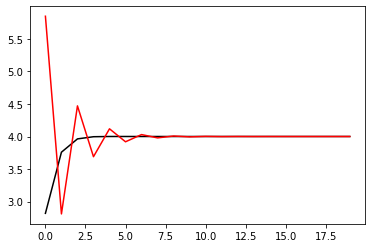

In [9]:
x = np.array(range(0, 20))

y_seidel = np.zeros(20)

y_jacobi = np.zeros(20)

y1 = [0,0,0]
for i in range(20):
    y1 = seidel(a,y1,b)
    y_seidel[i] = y1[2]
    
x1 = [0,0,0]
for i in range(20):
    x1 = jacobi(a,x1,b)
    #print()
    y_jacobi[i] = x1[2]
    
plt.plot(x, y_seidel, 'k')
plt.plot(x, y_jacobi, 'r')